<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Outlier/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Wide Table/WideTable.xlsx')
df = df.iloc[:, 1:]
df.head()

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,eGFR_t1,time_t1,LabLocation,LabCwhen
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,NaN,215.0,81.0,123.0,99.0,NaN,63.60,2017-10-03 09:19:54.710,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,NaN,219.0,64.0,146.0,73.0,NaN,70.20,2018-12-12 09:18:49.913,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,5.3,193.0,62.0,129.0,65.0,NaN,64.02,2019-12-19 09:51:24.427,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,NaN,205.0,69.0,139.0,76.0,NaN,48.54,2021-03-04 10:01:42.113,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,5.5,198.0,74.0,129.0,60.0,NaN,80.47,2022-04-21 08:45:54.580,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037


In [3]:
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')
vital = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/vitalsign.csv')

In [4]:
missfr = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')
missfr = missfr.iloc[:, 1:]
missfr.head()

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,...,5.8998,256.67,91.0,5.559,215.0,81.0,123.0,99.0,65.810,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2560-10-03 07:37:22.777,...,5.6377,260.39,86.0,5.489,219.0,64.0,146.0,73.0,105.881,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2561-12-12 07:58:57.190,...,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,51.688,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2562-12-19 08:19:38.647,...,4.9215,206.32,89.0,5.414,205.0,69.0,139.0,76.0,20.270,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2564-03-04 07:55:40.703,...,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,47.001,1


In [ ]:
vital['ResultValue'] = pd.to_numeric(vital['ResultValue'], errors='coerce')
condition1 = vital['ResultItemName'] == 'Systolic BP'
condition2 = vital['ResultValue'] < 1
check = vital[condition1 & condition2]
check

In [ ]:
lab['ResultValue'] = pd.to_numeric(lab['ResultValue'], errors='coerce')
condition1 = lab['ResultItemName'] == 'SUGAR IN NAF-PLASMA, 32203'
condition2 = lab['ResultValue'] > 900
s = lab[condition1 & condition2]
s

##**check outlier**

In [5]:
numeric = df.select_dtypes(include=['int64', 'float64'])
min_values = numeric.min()
max_values = numeric.max()
mean_values = numeric.mean()
sd_values = numeric.std()
null_count = df.isnull().sum()  # Count null values for each column

result_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values,
    'Mean': mean_values,
    'SD': sd_values,
    'Null Count': null_count  # Add a new column for null count
})
result_df

,Min,Max,Mean,SD,Null Count
Age,18.0,102.00,66.812828,11.646585,0
BMI,0.0,186879.99,31.794946,970.272941,15339
BSA,0.0,166.26,1.673563,1.035928,15349
D10:Ischemic heart disease,0.0,2.00,0.014994,0.122621,0
D11:Heart failure,0.0,2.00,0.005530,0.075431,0
...,...,...,...,...,...
StartDTTM,NaN,NaN,NaN,NaN,0
Systolic BP,0.0,128128.00,143.681682,801.599178,6801
VisitLocation,NaN,NaN,NaN,NaN,0
eGFR_t1,1.3,142.90,53.188739,16.696552,0


In [ ]:
#result_df.to_csv('Outlier_WideTable.csv') #ค่าก่อนและหลัง impute missing มีค่าเท่ากัน

##**plot outlier**

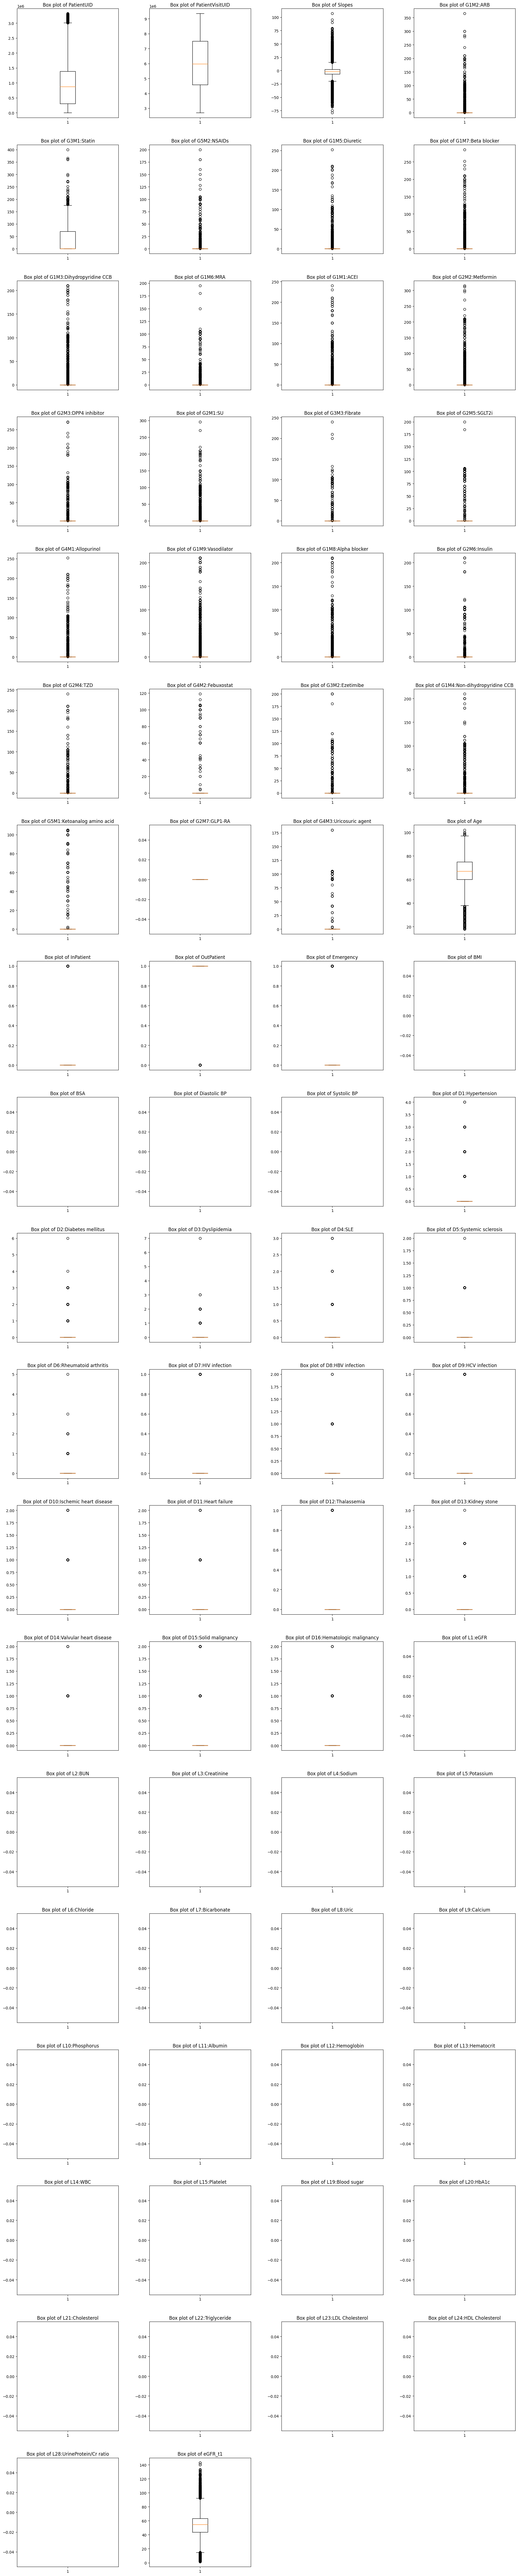

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numeric_columns)
num_plots_per_row = 4
num_rows = num_cols // num_plots_per_row + 1

fig, axs = plt.subplots(num_rows, num_plots_per_row, figsize=(20, 5 * num_rows))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numeric_columns):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    axs[row, col].boxplot(df[column])
    axs[row, col].set_title('Box plot of ' + column)

# Hide empty subplots
for i in range(num_cols, num_rows * num_plots_per_row):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    fig.delaxes(axs[row, col])

plt.show()

###**plot**

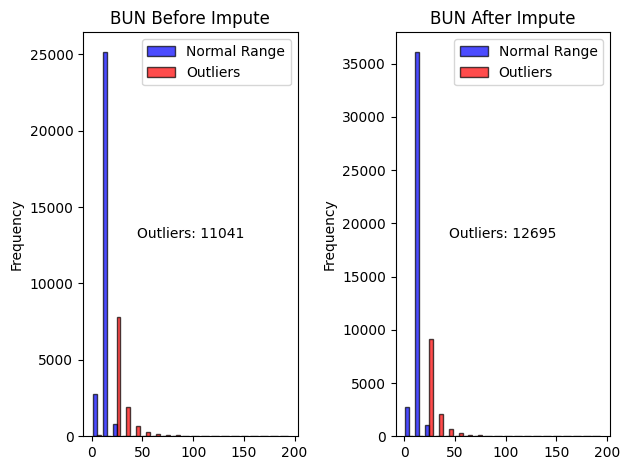

In [33]:
import matplotlib.pyplot as plt
check_before_impute = df['L2:BUN']  # Change column name
reference_range = (5, 20)  # Define the reference range
outliersL2 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL2], check_before_impute[outliersL2]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL2.sum()
plt.title('BUN Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L2-BUN']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('BUN After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

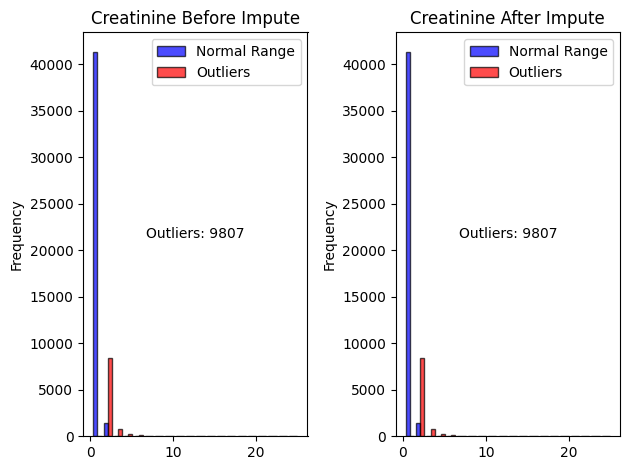

In [35]:
check_before_impute = df['L3:Creatinine']  # Change column name
reference_range = (0.50, 1.5)  # Define the reference range
outliersL3 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL3], check_before_impute[outliersL3]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL3.sum()
plt.title('Creatinine Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L3-Creatinine']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Creatinine After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


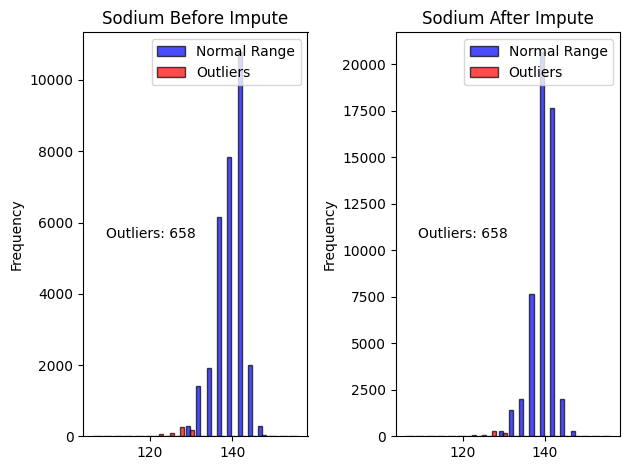

In [36]:
check_before_impute = df['L4:Sodium']  # Change column name
reference_range = (130, 147)  # Define the reference range
outliersL4 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL4], check_before_impute[outliersL4]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL4.sum()
plt.title('Sodium Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L4-Sodium']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Sodium After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

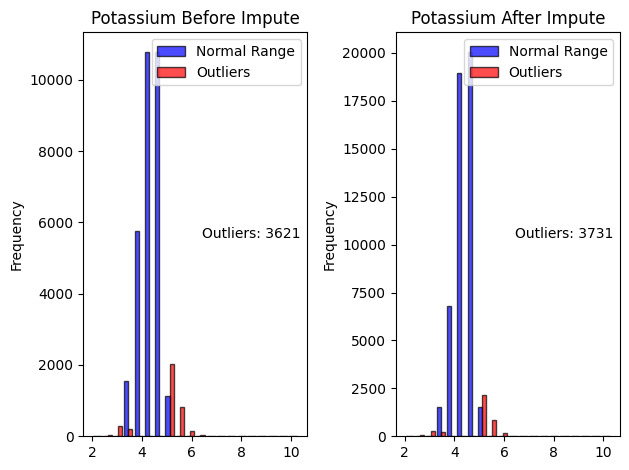

In [37]:
check_before_impute = df['L5:Potassium']  # Change column name
reference_range = (3.4, 5)  # Define the reference range
outliersL5 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL5], check_before_impute[outliersL5]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL5.sum()
plt.title('Potassium Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.75, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L5-Potassium']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Potassium After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.75, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

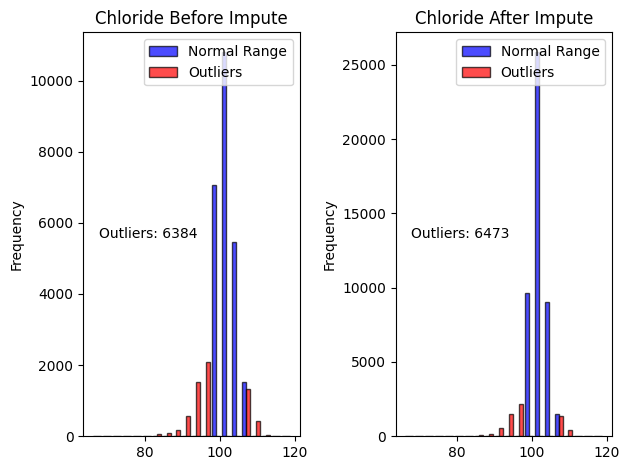

In [38]:
check_before_impute = df['L6:Chloride']  # Change column name
reference_range = (98, 106)  # Define the reference range
outliersL6 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL6], check_before_impute[outliersL6]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL6.sum()
plt.title('Chloride Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L6-Chloride']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Chloride After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

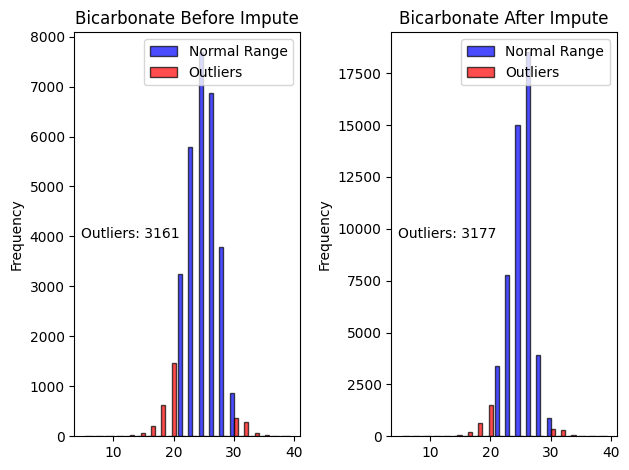

In [39]:
check_before_impute = df['L7:Bicarbonate']  # Change column name
reference_range = (20.6, 30)  # Define the reference range
outliersL7 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL7], check_before_impute[outliersL7]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL7.sum()
plt.title('Bicarbonate Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.25, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L7-Bicarbonate']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Bicarbonate After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.25, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

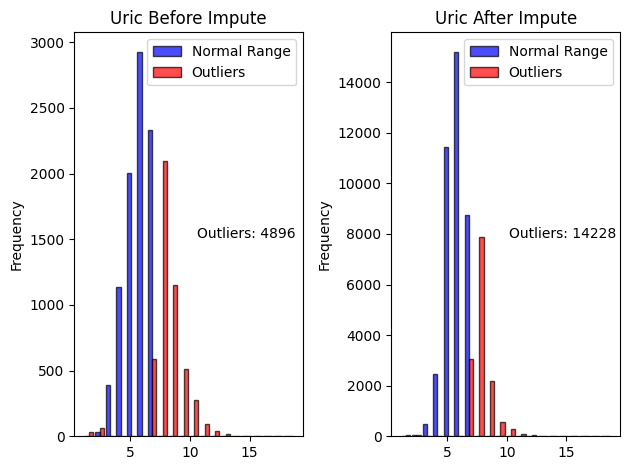

In [40]:
check_before_impute = df['L8:Uric']  # Change column name
reference_range = (2.7, 7.0)  # Define the reference range
outliersL8 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL8], check_before_impute[outliersL8]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL8.sum()
plt.title('Uric Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.75, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L8-Uric']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Uric After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.75, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

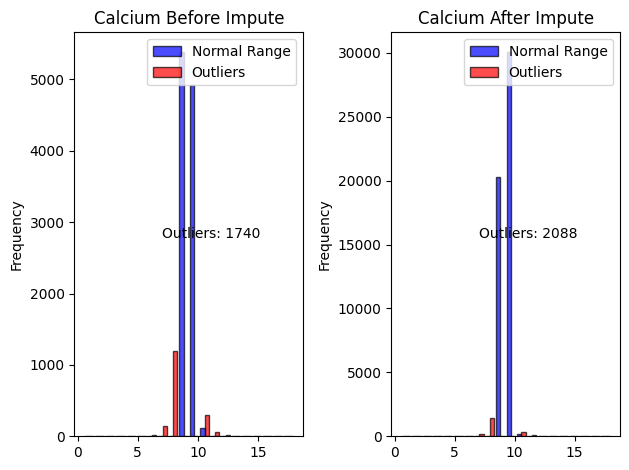

In [41]:
check_before_impute = df['L9:Calcium']  # Change column name
reference_range = (8.4, 10.2)  # Define the reference range
outliersL9 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL9], check_before_impute[outliersL9]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL9.sum()
plt.title('Calcium Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.6, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L9-Calcium']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Calcium After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.6, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

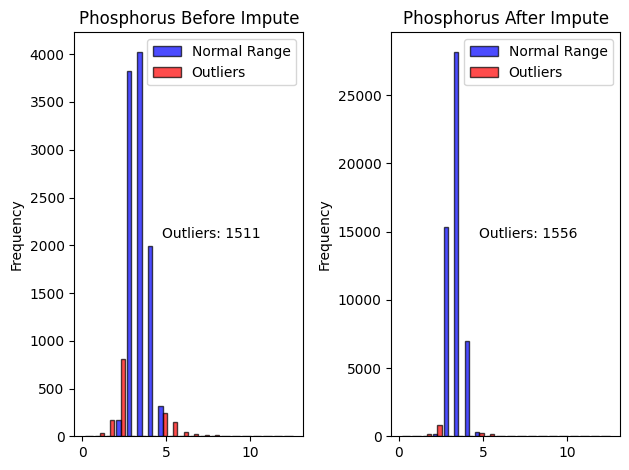

In [42]:
check_before_impute = df['L10:Phosphorus']  # Change column name
reference_range = (2.5, 4.6)  # Define the reference range
outliersL10 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL10], check_before_impute[outliersL10]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL10.sum()
plt.title('Phosphorus Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.6, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L10-Phosphorus']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Phosphorus After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.6, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

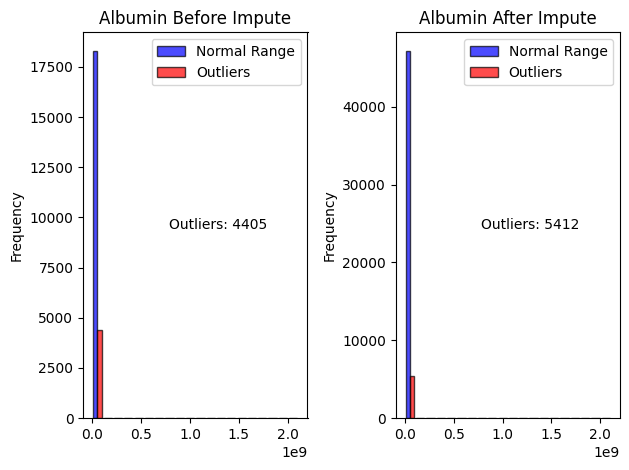

In [43]:
check_before_impute = df['L11:Albumin']  # Change column name
reference_range = (3.8, 5.4)  # Define the reference range
outliersL11 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL11], check_before_impute[outliersL11]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL11.sum()
plt.title('Albumin Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.6, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L11-Albumin']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Albumin After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.6, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

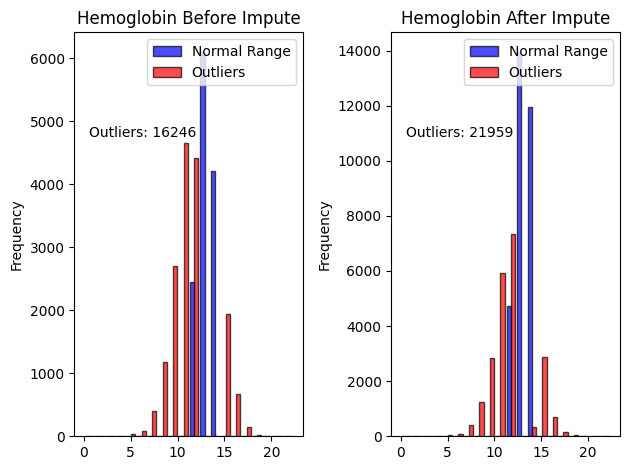

In [44]:
check_before_impute = df['L12:Hemoglobin']  # Change column name
reference_range = (12, 14.5)  # Define the reference range
outliersL12 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL12], check_before_impute[outliersL12]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL12.sum()
plt.title('Hemoglobin Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L12-Hemoglobin']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Hemoglobin After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

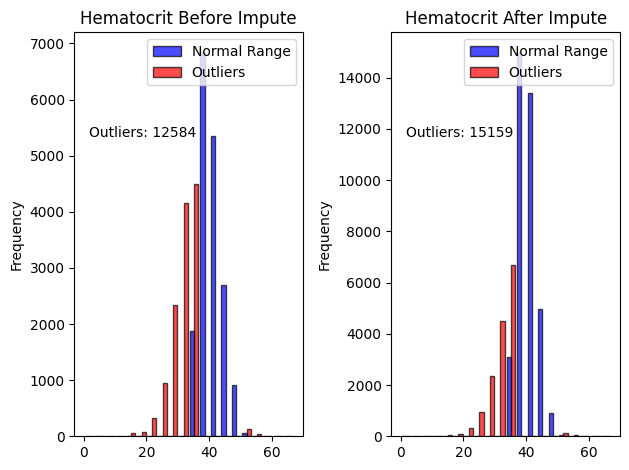

In [45]:
check_before_impute = df['L13:Hematocrit']  # Change column name
reference_range = (36.0, 50.8)  # Define the reference range
outliersL13 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL13], check_before_impute[outliersL13]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL13.sum()
plt.title('Hematocrit Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L13-Hematocrit']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Hematocrit After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

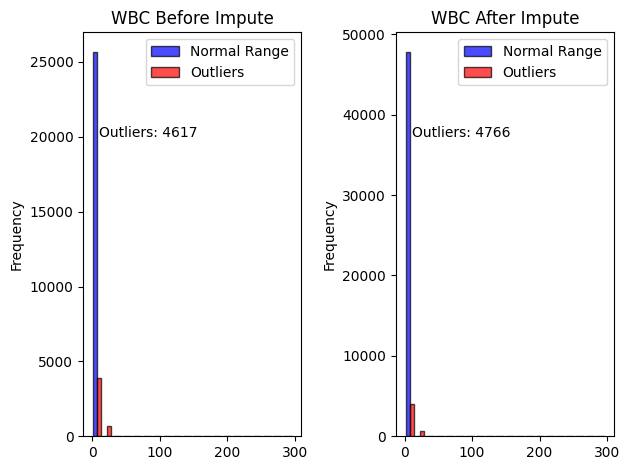

In [46]:
check_before_impute = df['L14:WBC']  # Change column name
reference_range = (4.0, 10.60)  # Define the reference range
outliersL14 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL14], check_before_impute[outliersL14]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL14.sum()
plt.title('WBC Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L14-WBC']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('WBC After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

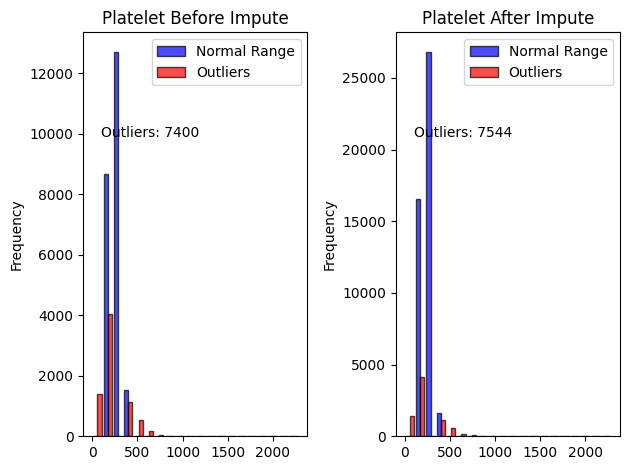

In [47]:
check_before_impute = df['L15:Platelet']  # Change column name
reference_range = (173, 383)  # Define the reference range
outliersL15 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL15], check_before_impute[outliersL15]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL15.sum()
plt.title('Platelet Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L15-Platelet']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Platelet After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

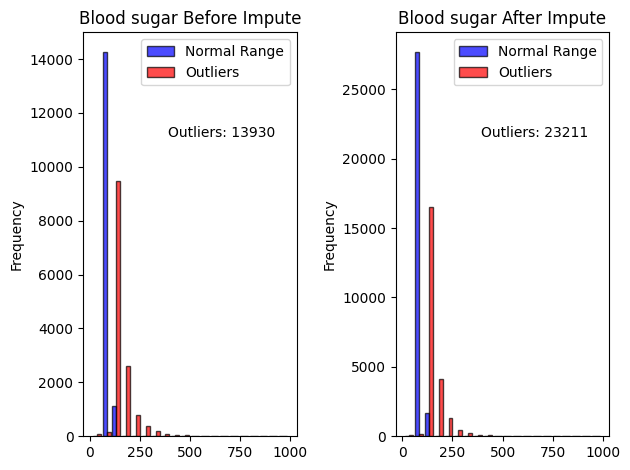

In [48]:
check_before_impute = df['L19:Blood sugar']  # Change column name
reference_range = (70, 110)  # Define the reference range
outliersL19 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL19], check_before_impute[outliersL19]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL19.sum()
plt.title('Blood sugar Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L19-Blood-sugar']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Blood sugar After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

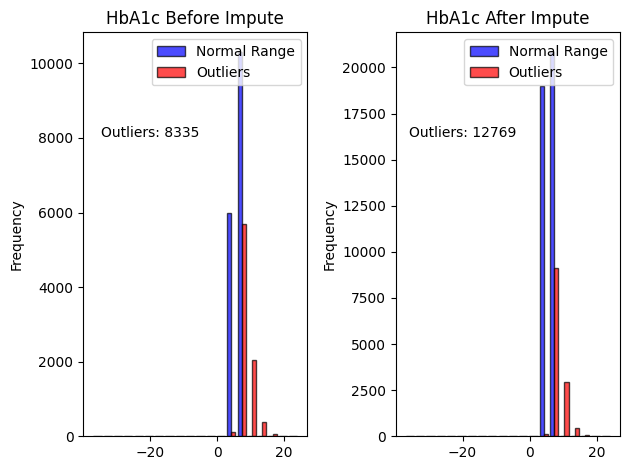

In [49]:
check_before_impute = df['L20:HbA1c']  # Change column name
reference_range = (4.6, 7.0)  # Define the reference range
outliersL20 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL20], check_before_impute[outliersL20]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL20.sum()
plt.title('HbA1c Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L20-HbA1c']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('HbA1c After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.3, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

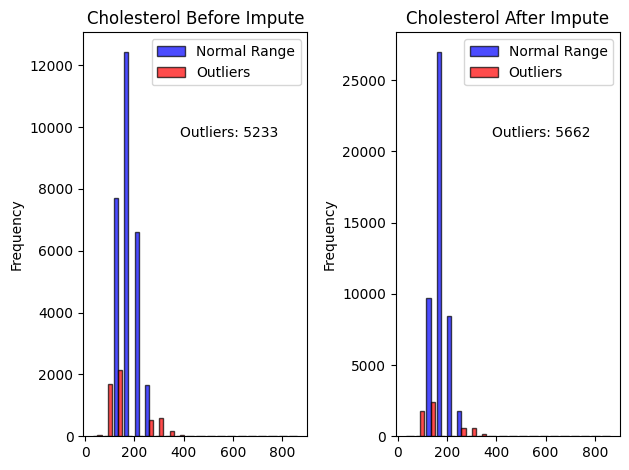

In [50]:
check_before_impute = df['L21:Cholesterol']  # Change column name
reference_range = (127, 262)  # Define the reference range
outliersL21 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL21], check_before_impute[outliersL21]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL21.sum()
plt.title('Cholesterol Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L21-Cholesterol']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Cholesterol After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

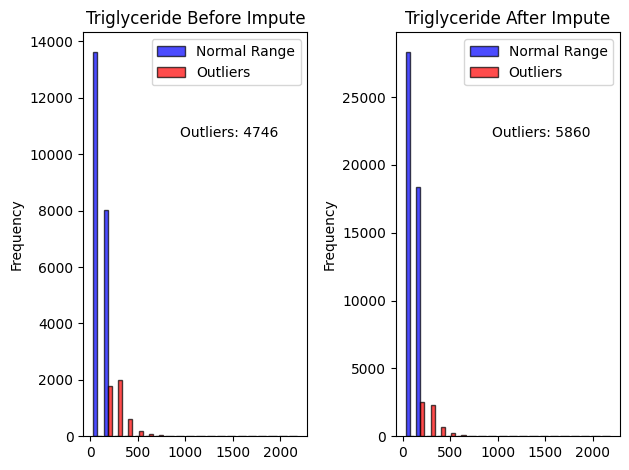

In [51]:
check_before_impute = df['L22:Triglyceride']  # Change column name
reference_range = (10, 200)  # Define the reference range
outliersL22 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL22], check_before_impute[outliersL22]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL22.sum()
plt.title('Triglyceride Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L22-Triglyceride']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Triglyceride After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

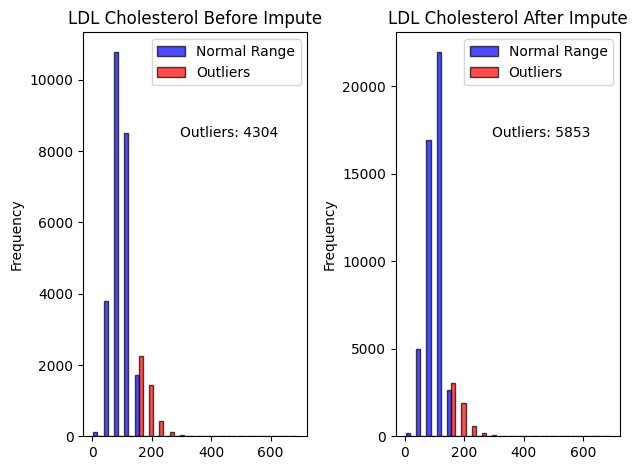

In [52]:
check_before_impute = df['L23:LDL Cholesterol']  # Change column name
reference_range = (10, 150)  # Define the reference range
outliersL23 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL23], check_before_impute[outliersL23]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL23.sum()
plt.title('LDL Cholesterol Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L23-LDL-Cholesterol']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('LDL Cholesterol After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [53]:
import numpy

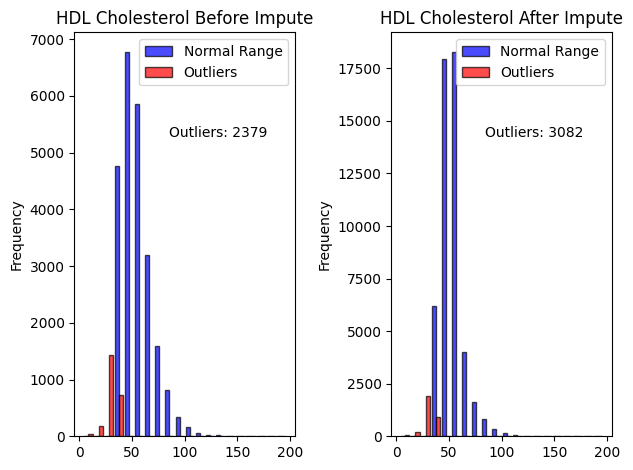

In [54]:
check_before_impute = df['L24:HDL Cholesterol']  # Change column name
reference_range = (35, numpy.inf)  # Define the reference range
outliersL24 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL24], check_before_impute[outliersL24]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL24.sum()
plt.title('HDL Cholesterol Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L24-HDL-Cholesterol']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('HDL Cholesterol After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

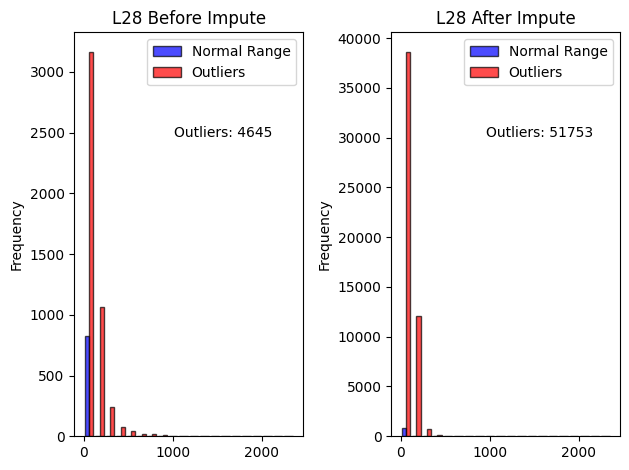

In [55]:
check_before_impute = df['L28:UrineProtein/Cr ratio']  # Change column name
reference_range = (0, 15)  # Define the reference range
outliersL28 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL28], check_before_impute[outliersL28]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL28.sum()
plt.title('L28 Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['L28-UrineProtein-Cr-ratio']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('L28 After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

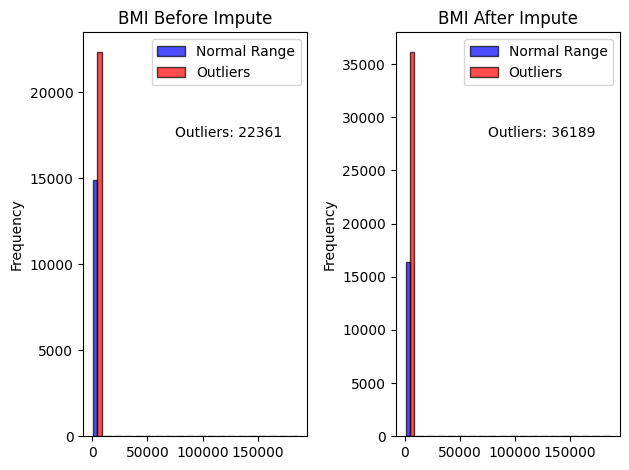

In [56]:
check_before_impute = df['BMI']  # Change column name
reference_range = (18.6, 24)  # Define the reference range
outliersBMI = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersBMI], check_before_impute[outliersBMI]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersBMI.sum()
plt.title('BMI Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['BMI']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('BMI After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

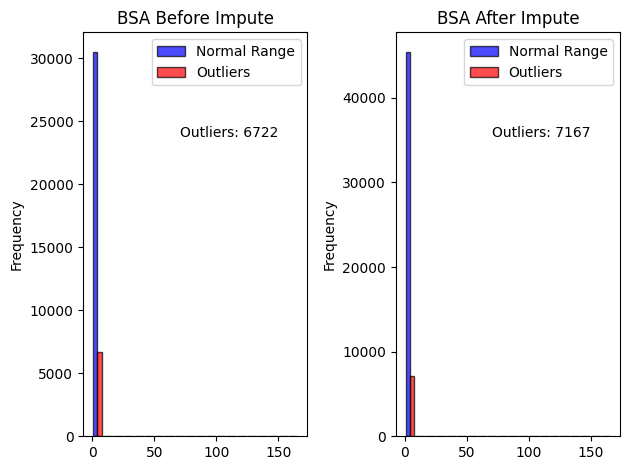

In [57]:
check_before_impute = df['BSA']  # Change column name
reference_range = (1.5, 2.2)  # Define the reference range
outliersBSA = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersBSA], check_before_impute[outliersBSA]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersBSA.sum()
plt.title('BSA Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['BSA']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('BSA After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

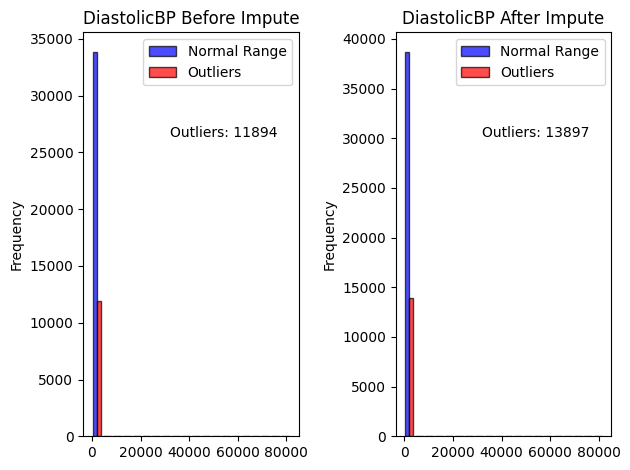

In [58]:
check_before_impute = df['Diastolic BP']  # Change column name
reference_range = (-numpy.inf, 80)  # Define the reference range
outliersDi = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersDi], check_before_impute[outliersDi]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersDi.sum()
plt.title('DiastolicBP Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['Diastolic-BP']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('DiastolicBP After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

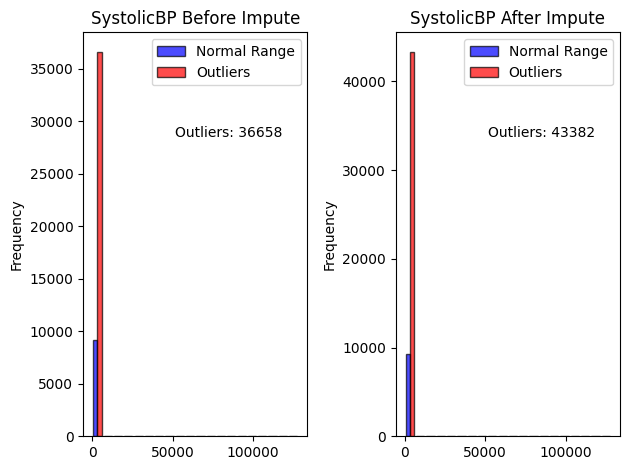

In [59]:
check_before_impute = df['Systolic BP']  # Change column name
reference_range = (-numpy.inf, 120)  # Define the reference range
outliersSy = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersSy], check_before_impute[outliersSy]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersSy.sum()
plt.title('SystolicBP Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = missfr['Systolic-BP']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('SystolicBP After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.65, 0.75, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

##**change outlier to null**

In [60]:
df.loc[outliersL2, 'L2:BUN'] = None
df.loc[outliersL3, 'L3:Creatinine'] = None
df.loc[outliersL4, 'L4:Sodium'] = None
df.loc[outliersL5, 'L5:Potassium'] = None
df.loc[outliersL6, 'L6:Chloride'] = None
df.loc[outliersL7, 'L7:Bicarbonate'] = None
df.loc[outliersL8, 'L8:Uric'] = None
df.loc[outliersL9, 'L9:Calcium'] = None
df.loc[outliersL10, 'L10:Phosphorus'] = None
df.loc[outliersL11, 'L11:Albumin'] = None
df.loc[outliersL12, 'L12:Hemoglobin'] = None
df.loc[outliersL13, 'L13:Hematocrit'] = None
df.loc[outliersL14, 'L14:WBC'] = None
df.loc[outliersL15, 'L15:Platelet'] = None
df.loc[outliersL19, 'L19:Blood sugar'] = None
df.loc[outliersL20, 'L20:HbA1c'] = None
df.loc[outliersL21, 'L21:Cholesterol'] = None
df.loc[outliersL22, 'L22:Triglyceride'] = None
df.loc[outliersL23, 'L23:LDL Cholesterol'] = None
df.loc[outliersL24, 'L24:HDL Cholesterol'] = None
df.loc[outliersL28, 'L28:UrineProtein/Cr ratio'] = None
df.loc[outliersBMI, 'BMI'] = None
df.loc[outliersBSA, 'BSA'] = None
df.loc[outliersDi, 'Diastolic BP'] = None
df.loc[outliersSy, 'Systolic BP'] = None

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   G1M2:ARB                      52620 non-null  int64         
 4   G3M1:Statin                   52620 non-null  int64         
 5   G5M2:NSAIDs                   52620 non-null  int64         
 6   G1M5:Diuretic                 52620 non-null  int64         
 7   G1M7:Beta blocker             52620 non-null  int64         
 8   G1M3:Dihydropyridine CCB      52620 non-null  int64         
 9   G1M6:MRA                      52620 non-null  int64         
 10  G1M1:ACEI                     52620 non-null  int64         
 11  G2M2:Metformin              

Number of outliers: 0


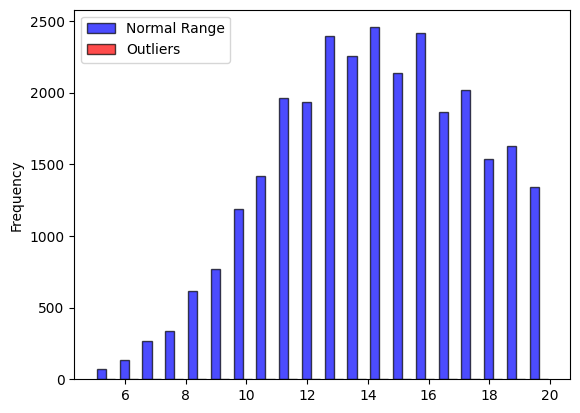

In [63]:
import matplotlib.pyplot as plt
check = df['L2:BUN'] # you have to change column name
reference_range = (5, 20) # Define the reference range
outliers = (check < reference_range[0]) | (check > reference_range[1])

plt.hist([check[~outliers], check[outliers]], bins=20, color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

plt.ylabel('Frequency')
plt.legend()
plt.show()


Number of outliers: 0


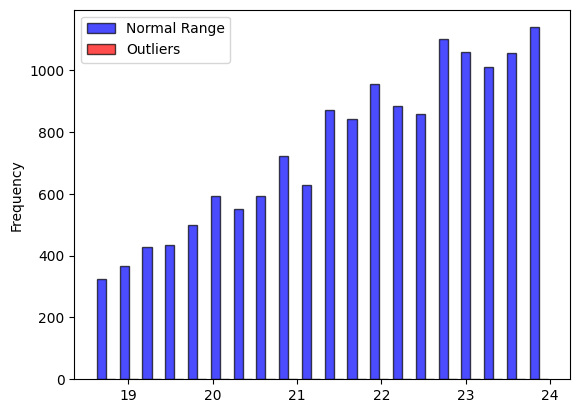

In [66]:
import matplotlib.pyplot as plt
check = df['BMI'] # you have to change column name
reference_range = (18.6, 24) # Define the reference range
outliers = (check < reference_range[0]) | (check > reference_range[1])

plt.hist([check[~outliers], check[outliers]], bins=20, color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

plt.ylabel('Frequency')
plt.legend()
plt.show()


In [65]:
df.to_csv('df_cut_outlier.csv')